<a href="https://colab.research.google.com/github/markasif/ANN_Deep_Learning-Examples-/blob/main/Pizza_Or_Not(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD
import cv2
from tensorflow.keras.utils import load_img,img_to_array

In [ ]:
dataset= tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/Work/pizza_not_pizza',
                                                             shuffle=True,
                                                             image_size=(64,64),
                                                             batch_size=32)

Found 1976 files belonging to 2 classes.


In [ ]:
classes=['pizza','not_pizza']

In [ ]:
classes = dataset.class_names
classes

['not_pizza', 'pizza']

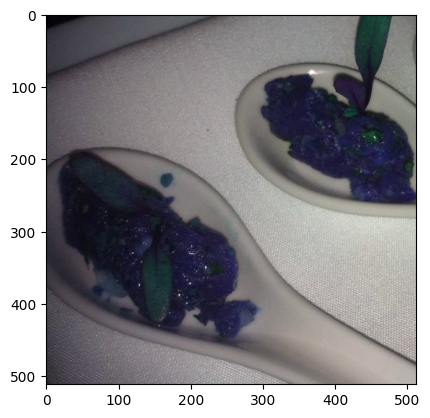

In [ ]:
plt.imshow(cv2.imread("/content/drive/MyDrive/Work/pizza_not_pizza/not_pizza/1005746.jpg"))

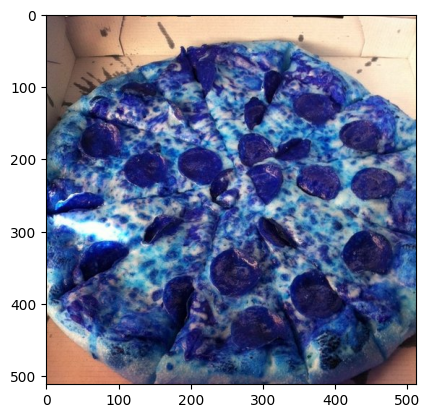

In [ ]:
plt.imshow(cv2.imread("/content/drive/MyDrive/Work/pizza_not_pizza/pizza/1001116.jpg"))

In [ ]:
datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True,
                           validation_split = 0.2)
training_set=datagen.flow_from_directory('/content/drive/MyDrive/Work/pizza_not_pizza',
                                         target_size=(64,64),
                                         batch_size=32,
                                         class_mode="binary",
                                         subset="training")

Found 1582 images belonging to 2 classes.


In [ ]:
validation_set=datagen.flow_from_directory("/content/drive/MyDrive/Work/pizza_not_pizza",
                                           target_size=(64,64),
                                           batch_size=32,
                                           class_mode='binary',
                                           subset='validation')

Found 394 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.compile(loss="binary_crossentropy",optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
training_data = model.fit(x=training_set,validation_data=validation_set,epochs=15)
training_data

Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 368s 6s/step - accuracy: 0.5343 - loss: 0.7591 - val_accuracy: 0.6523 - val_loss: 0.6249
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 209ms/step - accuracy: 0.6586 - loss: 0.6180 - val_accuracy: 0.6701 - val_loss: 0.6169
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 205ms/step - accuracy: 0.7024 - loss: 0.5743 - val_accuracy: 0.7030 - val_loss: 0.5645
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 205ms/step - accuracy: 0.7325 - loss: 0.5510 - val_accuracy: 0.6904 - val_loss: 0.5824
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 195ms/step - accuracy: 0.7185 - loss: 0.5500 - val_accuracy: 0.7538 - val_loss: 0.5286
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 214ms/step - accuracy: 0.7427 - loss: 0.5319 - val_accuracy: 0.7437 - val_loss: 0.5442
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 207ms/step - accuracy: 0.7609 - loss: 0.4992 - val_accuracy: 0.7335 - val_loss: 0.5329
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 203ms/step - accuracy: 0.7425 - loss: 0.5043 - val_accura

In [ ]:
hist = training_data.history
hist.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
hist['val_accuracy'][-1]

0.7690355181694031

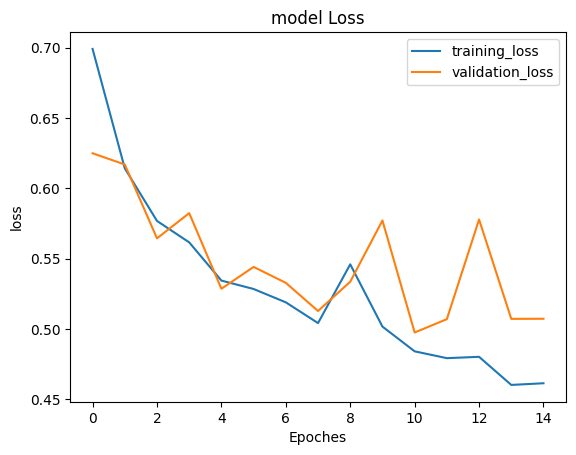

In [ ]:
plt.plot(hist["loss"],label="training_loss")
plt.plot(hist["val_loss"],label="validation_loss")
plt.title("model Loss")
plt.xlabel("Epoches")
plt.ylabel("loss")
plt.legend()
plt.show()

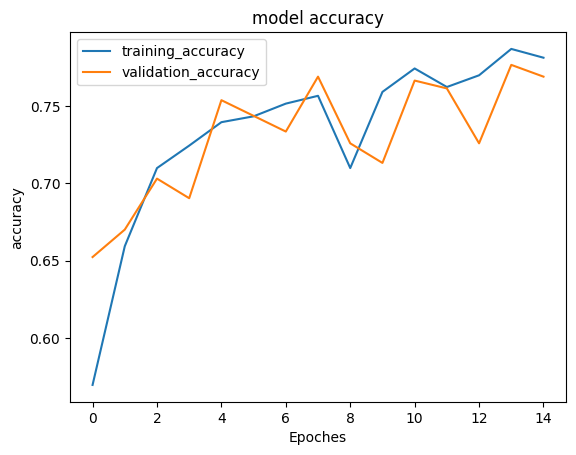

In [ ]:
plt.plot(hist["accuracy"],label="training_accuracy")
plt.plot(hist["val_accuracy"],label="validation_accuracy")
plt.title("model accuracy")
plt.xlabel("Epoches")
plt.ylabel("accuracy")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
class {'not_pizza': 0, 'pizza': 1}
pizza


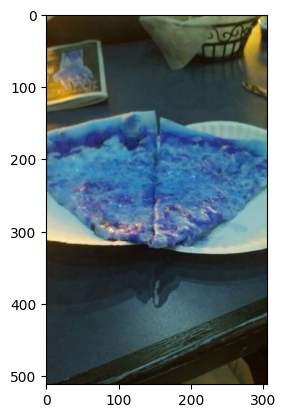

In [ ]:
test_image=load_img("/content/drive/MyDrive/Work/pizza_not_pizza/pizza/1054420.jpg",target_size=(64,64))
plt.imshow(cv2.imread("/content/drive/MyDrive/Work/pizza_not_pizza/pizza/1054420.jpg"))
test_image_array = img_to_array(test_image)
test_image_array= np.expand_dims(test_image,axis=0)
result=model.predict(test_image_array)
print('class',training_set.class_indices)
if result[0][0] ==1:
  prediction = 'pizza'
else:
  prediction = "not pizza"

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
class {'not_pizza': 0, 'pizza': 1}
not pizza


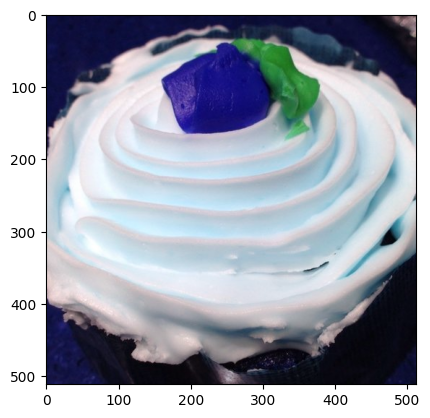

In [ ]:
test_image=load_img("/content/drive/MyDrive/Work/pizza_not_pizza/not_pizza/1012312.jpg",target_size=(64,64))
plt.imshow(cv2.imread("/content/drive/MyDrive/Work/pizza_not_pizza/not_pizza/1012312.jpg"))
test_image_array = img_to_array(test_image)
test_image_array= np.expand_dims(test_image,axis=0)
result=model.predict(test_image_array)
print('class',training_set.class_indices)
if result[0][0] ==1:
  prediction = 'pizza'
else:
  prediction = "not pizza"
print(prediction)